对于[-1, 1]上的函数$f(x)=\frac{1}{1+25x^2}$的Lagrange插值实验

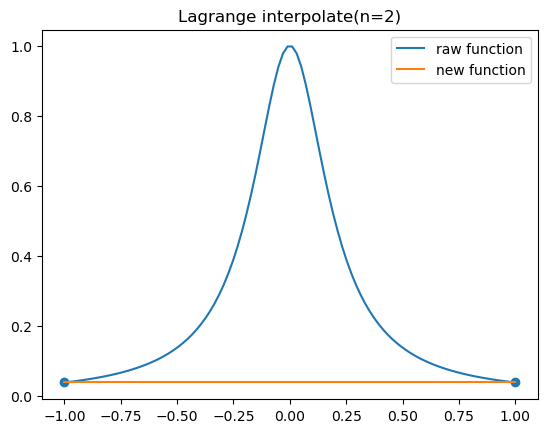

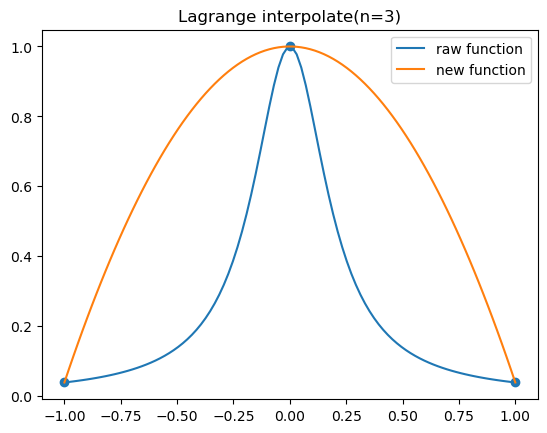

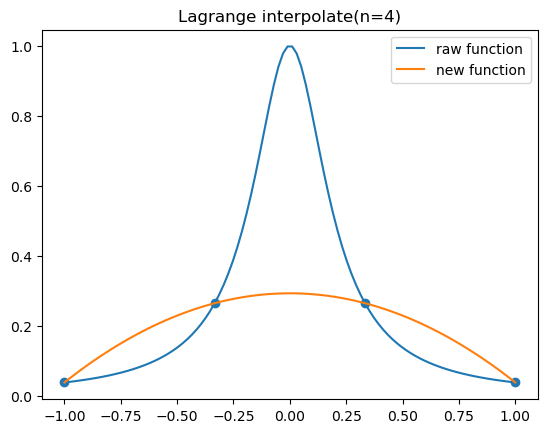

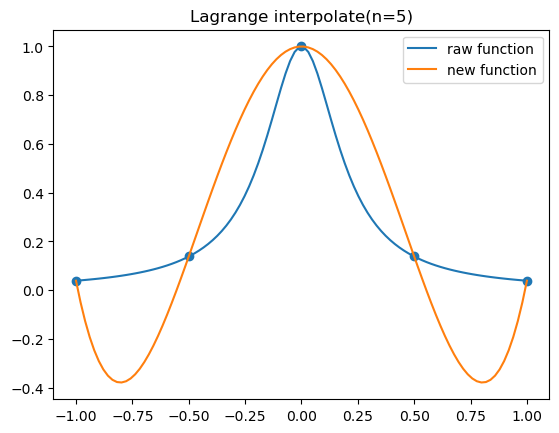

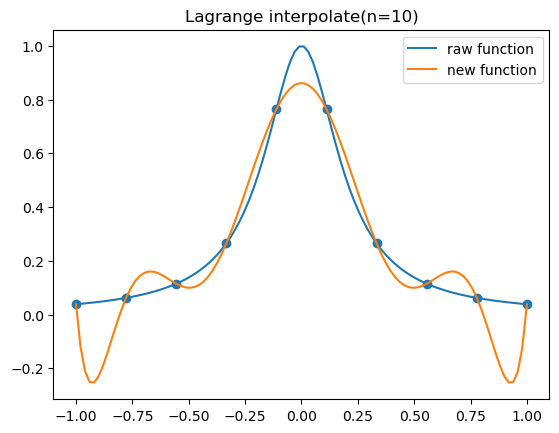

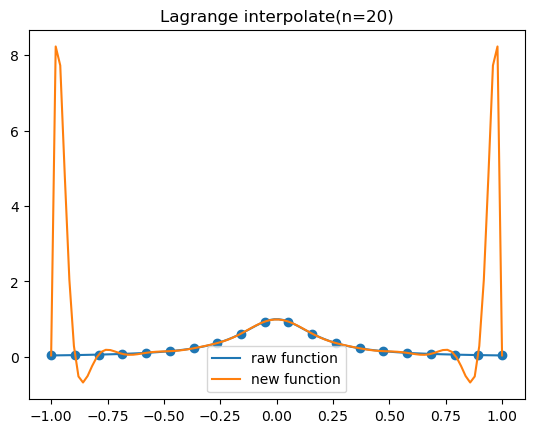

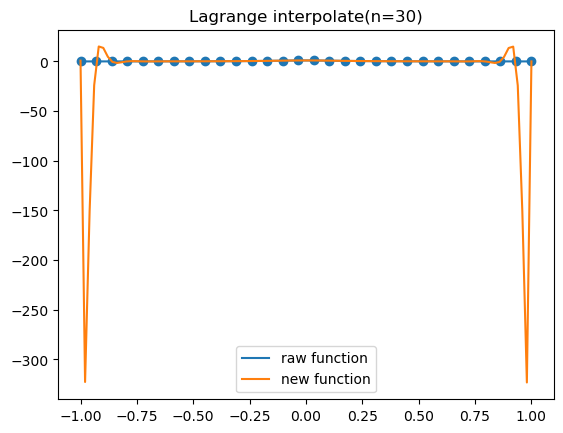

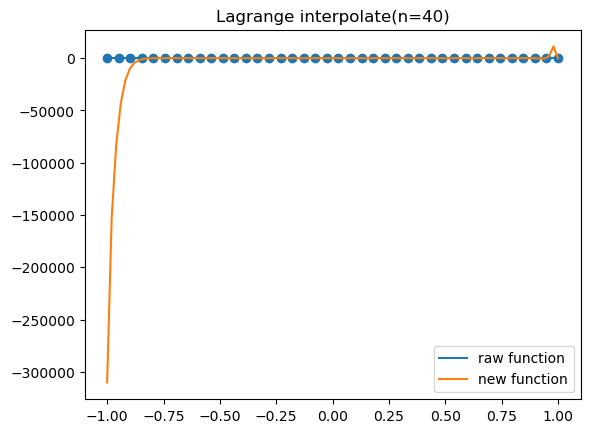

In [1]:
import numpy as np
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt

def function(x):
    return 1/(1+25*x**2)

def interpolate(n):
    x = np.linspace(-1, 1, num=n)
    y = function(x)
    poly = lagrange(x, y)
    x_new = np.linspace(-1, 1, num=100)
    plt.figure()
    plt.scatter(x,y)
    plt.title(f'Lagrange interpolate(n={n})')
    plt.plot(x_new,function(x_new),label='raw function')
    plt.plot(x_new,poly(x_new),label='new function')
    plt.legend()

for n in [2,3,4,5,10,20,30,40]:
    interpolate(n)


对于[-5, 5]上的函数$h(x)=\frac{x}{1+x^4}$的Lagrange插值实验

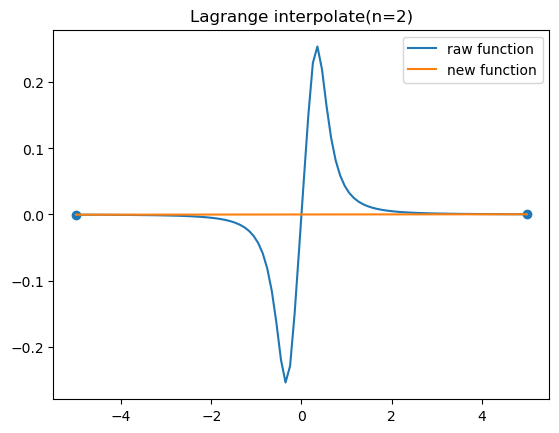

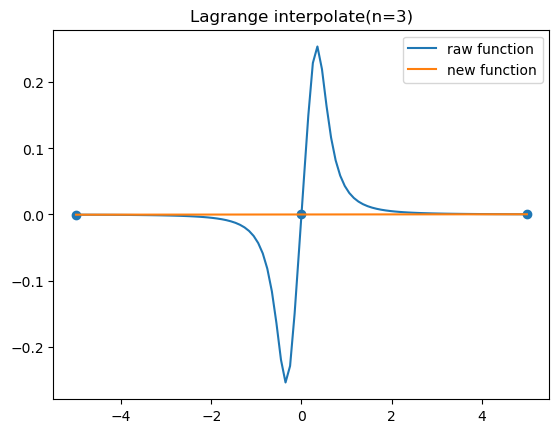

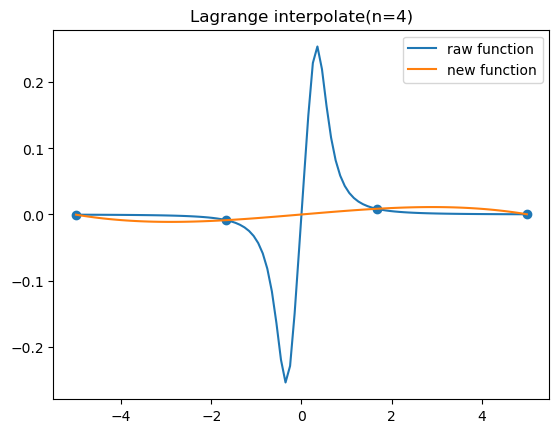

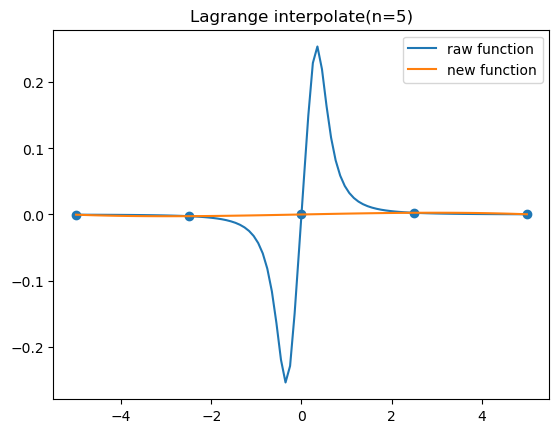

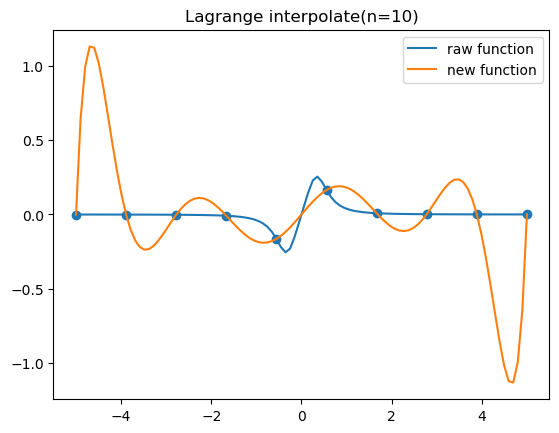

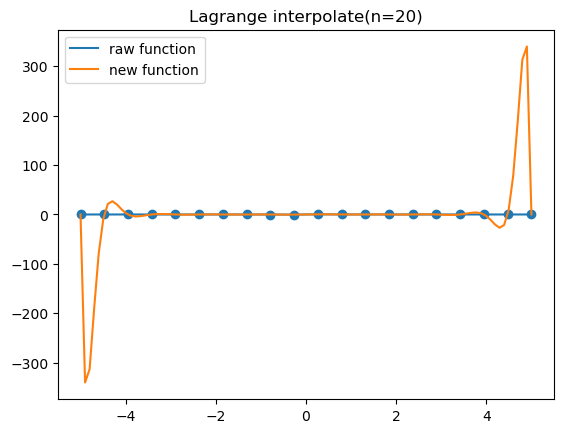

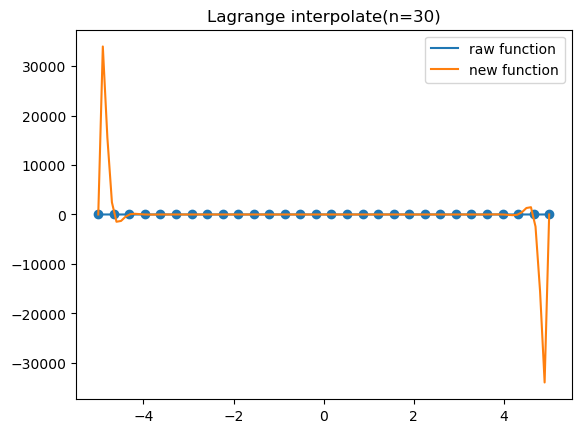

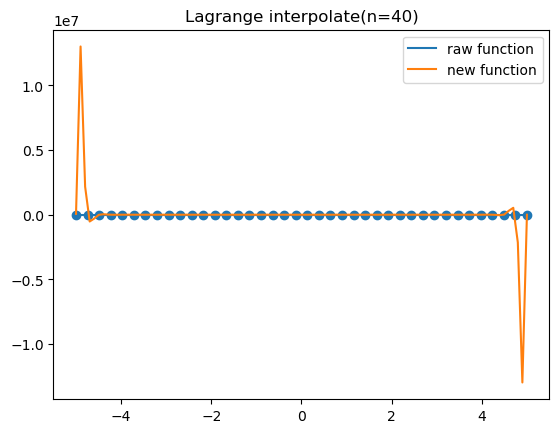

In [2]:
import numpy as np
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt

def function(x):
    return x/(1+25*(x**4))

def interpolate(n):
    x = np.linspace(-5, 5, num=n)
    y = function(x)
    poly = lagrange(x, y)
    x_new = np.linspace(-5, 5, num=100)
    plt.figure()
    plt.scatter(x,y)
    plt.title(f'Lagrange interpolate(n={n})')
    plt.plot(x_new,function(x_new),label='raw function')
    plt.plot(x_new,poly(x_new),label='new function')
    plt.legend()

for n in [2,3,4,5,10,20,30,40]:
    interpolate(n)


对于[-5, 5]上的函数$g(x)=arctanx$的Lagrange插值实验

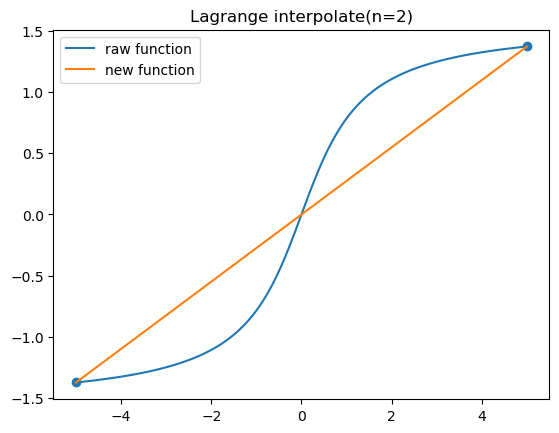

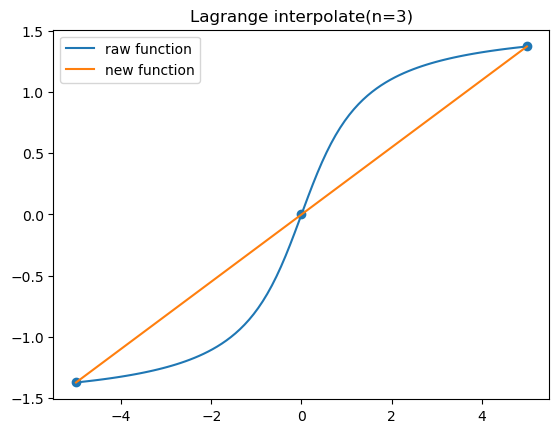

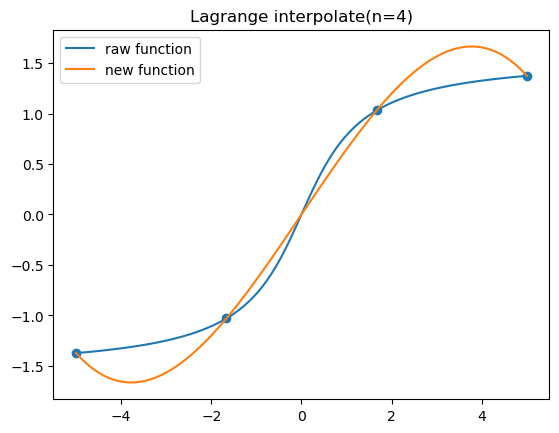

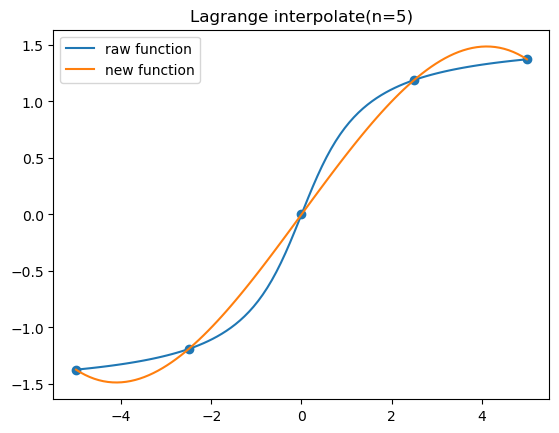

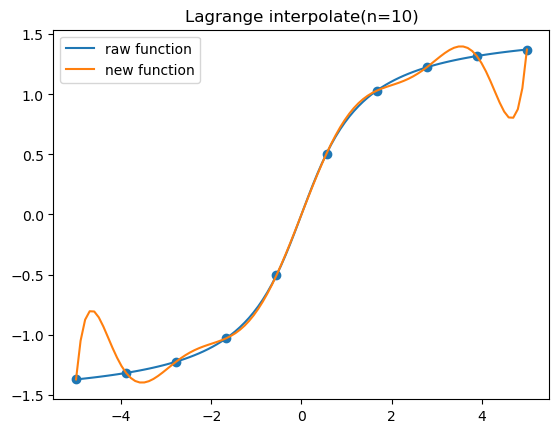

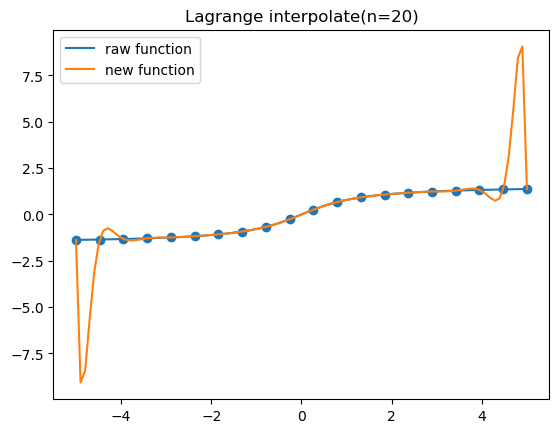

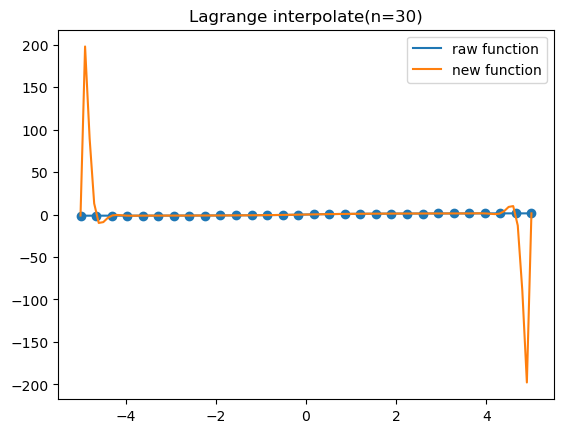

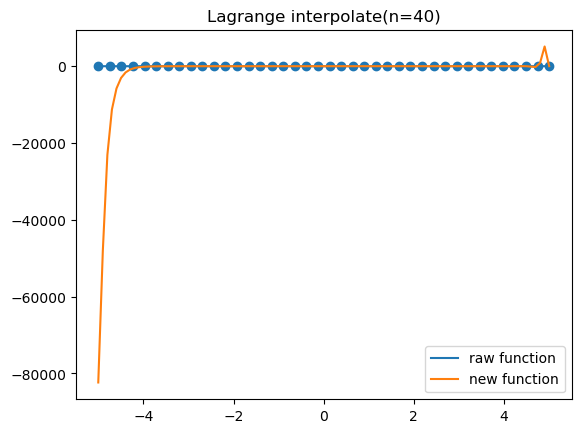

In [3]:
import numpy as np
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt

def function(x):
    return np.arctan(x)

def interpolate(n):
    x = np.linspace(-5, 5, num=n)
    y = function(x)
    poly = lagrange(x, y)
    x_new = np.linspace(-5, 5, num=100)
    plt.figure()
    plt.scatter(x,y)
    plt.title(f'Lagrange interpolate(n={n})')
    plt.plot(x_new,function(x_new),label='raw function')
    plt.plot(x_new,poly(x_new),label='new function')
    plt.legend()

for n in [2,3,4,5,10,20,30,40]:
    interpolate(n)

多项式最小二乘拟合

<!-- $y=1.999x^3 - 2.998x^2 - 0.00003968x+0.5491$ -->

拟合函数方程：       3         2
1.999 x - 2.998 x - 3.968e-05 x + 0.5491
拟合函数平方误差：2.176190476190483e-05


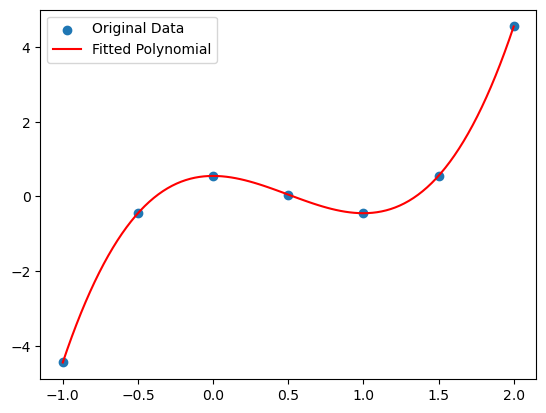

In [4]:
import numpy as np
import matplotlib.pyplot as plt
x = [-1.0,-0.5,0.0,0.5,1.0,1.5,2.0]
y = [-4.447,-0.452,0.551,0.048,-0.447,0.549,4.552]
coefficients = np.polyfit(x, y, deg=3)
polynomial = np.poly1d(coefficients)
print(f'拟合函数方程：{polynomial}')
squared_error = np.sum((y - polynomial(x)) ** 2)
print(f'拟合函数平方误差：{squared_error}')
x_fit = np.linspace(min(x), max(x), 100)
y_fit = polynomial(x_fit)
# 绘制原始数据和拟合的多项式
plt.scatter(x, y, label='Original Data')
plt.plot(x_fit, y_fit, color='red', label='Fitted Polynomial')
plt.legend()
plt.show()

正交化多项式最小二乘拟合

拟合函数方程：        3         2
0.7996 x - 1.998 x + 1.199 x - 0.4501
拟合函数平方误差：21.159022768170175


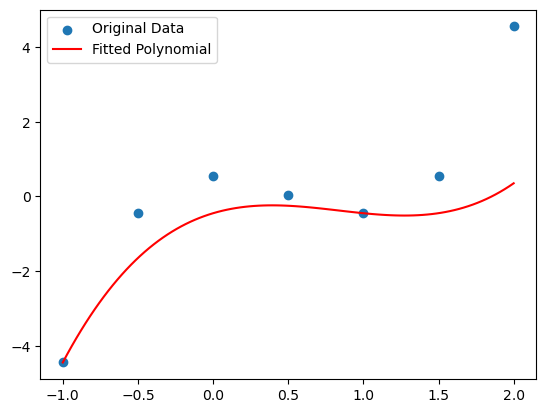

In [5]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
x = [-1.0,-0.5,0.0,0.5,1.0,1.5,2.0]
y = [-4.447,-0.452,0.551,0.048,-0.447,0.549,4.552]
degree = 3
# 构造设计矩阵
X = np.column_stack([sp.legendre(i)(x) for i in range(degree + 1)])
# 应用最小二乘法
coefficients, residuals, rank, s = np.linalg.lstsq(X, y, rcond=None)
fit_poly = np.poly1d(coefficients[::-1])
# 构造拟合多项式
print(f'拟合函数方程：{fit_poly}')
squared_error = np.sum((y - fit_poly(x)) ** 2)
print(f'拟合函数平方误差：{squared_error}')
x_fit = np.linspace(min(x), max(x), 100)
y_fit = fit_poly(x_fit)
# 绘制原始数据和拟合的多项式
plt.scatter(x, y, label='Original Data')
plt.plot(x_fit, y_fit, color='red', label='Fitted Polynomial')
plt.legend()
plt.show()

使用复合梯形及复合辛普森计算积分$\int_{0}^{1} \sqrt{x}lnx \, dx = -\frac{4}{9}$

In [6]:
import numpy as np

def f(x):
    return np.sqrt(x) * np.log(x)

def trapezoidal_rule(a, b, h):
    n = int((b - a) / h)
    x = np.linspace(a, b, n + 1)
    y = f(x)
    return (h / 2) * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])

def simpson_rule(a, b, h):
    n = int((b - a) / h)
    # 确保n是偶数
    if n % 2 == 1:
        n += 1  
    x = np.linspace(a, b, n + 1)
    y = f(x)
    return (h / 3) * (y[0] + 4 * np.sum(y[1:n:2]) + 2 * np.sum(y[2:n-1:2]) + y[n])

a, b = 1e-6, 1
h_values = [0.1, 0.05, 0.01, 0.001, 0.0001, 0.00001]
results = []
print(f'精确值:{-4/9}')
for h in h_values:
    trapezoidal = trapezoidal_rule(a, b, h)
    simpson = simpson_rule(a, b, h)
    results.append((h, trapezoidal, simpson))
    print(f'步长:{h} 复合梯形:{trapezoidal} 复合辛普森:{simpson}')
print('不存在最小的h使得精度不能再被改善')

精确值:-0.4444444444444444
步长:0.1 复合梯形:-0.3725103428277755 复合辛普森:-0.43024102624059235
步长:0.05 复合梯形:-0.41118751014449356 复合辛普森:-0.43886098252732847
步长:0.01 复合梯形:-0.43873796999264686 复合辛普森:-0.443839937810123
步长:0.001 复合梯形:-0.4439502488377164 复合辛普森:-0.44442284870269333
步长:0.0001 复合梯形:-0.4443987861852963 复合辛普森:-0.44444425994092285
步长:1e-05 复合梯形:-0.4444403972416582 复合辛普森:-0.4444448704837722
不存在最小的h使得精度不能再被改善


使用龙贝格求积分$\int_{0}^{1} \sqrt{x}lnx \, dx = -\frac{4}{9}$

In [7]:
import numpy as np
from scipy.integrate import romberg

def f(x):
    return np.sqrt(x) * np.log(x)

def trapezoidal_rule(a, b, h):
    n = int((b - a) / h)
    x = np.linspace(a, b, n + 1)
    y = f(x)
    return (h / 2) * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])

def romberg(f, a, b, n_max=10):
    R = [[0.0]]
    h = b - a
    R[0][0] = trapezoidal_rule(a,b,h)

    n = 1
    while True:
        # 新的行
        R.append([0.0] * (n + 1))
        # 计算复合梯形规则的近似值
        h = (b - a) / (2 ** n)
        R[n][0] = trapezoidal_rule(a,b,h)
        # 理查德森外推
        for m in range(1, n + 1):
            R[n][m] = R[n][m-1] + (R[n][m-1] - R[n-1][m-1]) / (4**m - 1)
        if n >= n_max:
            return R
        n += 1

# 计算积分
R = romberg(f, 1e-4, 1)
print(f'{1}次递推后辛普森积分值:{R[1][1]}')
print(f'{2}次递推后科特斯积分值:{R[2][2]}')
print(f'{3}次递推后龙贝格积分值:{R[3][3]}')
print(f'{10}次递推后龙贝格积分值:{R[10][10]}')

1次递推后辛普森积分值:-0.34203827130353204
2次递推后科特斯积分值:-0.40747750852332243
3次递推后龙贝格积分值:-0.4305581668433657
10次递推后龙贝格积分值:-0.44443384173769857


In [5]:
import numpy as np
from scipy.interpolate import lagrange

x = [0.4,0.5,0.6,0.7]
y = [-0.916291,-0.693147,-0.510826,-0.356675]

def function(x):
    return np.log(x)

poly = lagrange(x[:3], y[:3])
print(poly)
print(poly(0.54))
print(function(0.54))


        2
-2.041 x + 4.068 x - 2.217
-0.6153198400000015
-0.616186139423817


In [1]:
import math
import numpy as np
def f(x,y):
    return x*x+x-y

def f0(x):
    return -np.exp(-x)+x*x-x+1

In [2]:
import numpy as np
x=np.linspace(0,0.5,6)
y=f0(x)
print(x)
print(y)


[0.  0.1 0.2 0.3 0.4 0.5]
[0.         0.00516258 0.02126925 0.04918178 0.08967995 0.14346934]


改进欧拉法

In [3]:
def step(x,y,h=0.1):
    y1=y+h*f(x,y)
    y2=y+0.5*h*(f(x,y)+f(x+h,y1))
    return y2

In [4]:
def loop(x0,y0,x=0.5,h=0.1):
    y=[y0]
    i = 0
    while True:
        y.append(step(x0+h*i,y[-1]))
        i=i+1
        if x0+h*i >= x:
            break
    return y

print(loop(0,0))

[0, 0.005500000000000001, 0.021927500000000003, 0.05014438750000001, 0.09093067068750002, 0.1449922569721875]


梯形法

In [7]:
def step(x,y,h=0.1,k=1):
    y1=y+h*f(x,y)
    y2=y+0.5*h*(f(x,y)+f(x+h,y1))
    for i in range(k):
        y2=y+0.5*h*(f(x,y)+f(x+h,y2))
    return y2

In [10]:
def loop(x0,y0,x=0.5,h=0.1,k=10):
    y=[y0]
    i = 0
    while True:
        y.append(step(x0+h*i,y[-1],k=k))
        i=i+1
        if x0+h*i >= x:
            break
    return y

print(loop(0,0,k=100))

[0, 0.00523809523809524, 0.021405895691609982, 0.0493672389590757, 0.08990369239154469, 0.14372238835425472]
